In [1]:
#import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit


In [2]:
dataset_csv = 'letter_csvs\\_final_.csv'
dataset_total_rows = 6104
dataset_total_columns = 42    #without the first coloumn (class id coloumn) 




X_dataset = np.loadtxt(dataset_csv, delimiter=',',dtype='float32', usecols=list(range(1, dataset_total_columns+1)))
Y_dataset = np.loadtxt(dataset_csv,delimiter=',',dtype='int32',usecols=(0))

X_train, X_test, Y_train, Y_test = train_test_split(X_dataset,Y_dataset,train_size=0.8, shuffle=True)

time_window = 1
training_num = int(dataset_total_rows * (1./float(time_window)) * 0.8)
testing_num = int(dataset_total_rows * (1./float(time_window)) * 0.2)

print(training_num,testing_num)

X_train = X_train.reshape(4883,time_window,dataset_total_columns)
X_test = X_test.reshape(1221, time_window,dataset_total_columns)
Y_train = Y_train.reshape(4883,time_window,1)
Y_test = Y_test.reshape(1221,time_window,1)

# print(X_train.shape[1:])
 

4883 1220


<ipython-input-2-ab40505f08ab>:9: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  Y_dataset = np.loadtxt(dataset_csv,delimiter=',',dtype='int32',usecols=(0))


In [3]:
model = Sequential()


model.add(Dense((100), input_shape = (X_train.shape[1:]),activation='relu'))
model.add(Dropout(0.2))

model.add(Dense((70), activation='relu'))
model.add(Dropout(0.2))          

model.add(Dense((50), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(27, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'], run_eagerly=True )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 100)            4300      
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 dense_1 (Dense)             (None, 1, 70)             7070      
                                                                 
 dropout_1 (Dropout)         (None, 1, 70)             0         
                                                                 
 dense_2 (Dense)             (None, 1, 50)             3550      
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 dense_3 (Dense)             (None, 1, 27)             1

In [4]:
history = model.fit(X_train,Y_train, epochs=40, validation_data=(X_test,Y_test))

Epoch 1/40
153/153 [==============================] - 11s 68ms/step - loss: 2.7913 - accuracy: 0.2034 - val_loss: 1.7463 - val_accuracy: 0.6036
Epoch 2/40
153/153 [==============================] - 11s 74ms/step - loss: 1.4874 - accuracy: 0.5052 - val_loss: 0.7761 - val_accuracy: 0.8583
Epoch 3/40
153/153 [==============================] - 11s 68ms/step - loss: 0.9977 - accuracy: 0.6658 - val_loss: 0.5032 - val_accuracy: 0.8976
Epoch 4/40
153/153 [==============================] - 10s 65ms/step - loss: 0.7700 - accuracy: 0.7381 - val_loss: 0.4024 - val_accuracy: 0.9255
Epoch 5/40
153/153 [==============================] - 10s 67ms/step - loss: 0.6413 - accuracy: 0.7801 - val_loss: 0.3019 - val_accuracy: 0.9156
Epoch 6/40
153/153 [==============================] - 11s 72ms/step - loss: 0.5282 - accuracy: 0.8200 - val_loss: 0.2554 - val_accuracy: 0.9296
Epoch 7/40
153/153 [==============================] - 11s 70ms/step - loss: 0.4612 - accuracy: 0.8417 - val_loss: 0.2099 - val_accuracy:

In [5]:
model_save_path = 'model\\model_03_10'
model.save(model_save_path+'.h5')

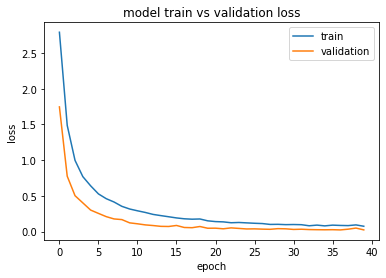

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig(model_save_path+'_loss_graph.png')
plt.show()

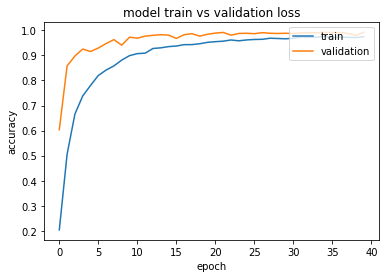

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig(model_save_path+'_accuracy_graph.png')
plt.show()